In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.7.0'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('two/train')
DATASET_PATH  = 'two/train'
TEST_DIR =  'two/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 20
NUM_EPOCHS    = 10
LEARNING_RATE = 0.0005

#### Generate Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=False,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="binary")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=False,batch_size=BATCH_SIZE,
                                                  subset = "validation",seed=42,
                                                  class_mode="binary")

/share/pkg.7/tensorflow/2.7.0/install/lib/SCC/../python3.9/site-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 9272 images belonging to 2 classes.
Found 2316 images belonging to 2 classes.


In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import applications 
from tensorflow.keras import optimizers
from tensorflow.keras import losses

conv_base=applications.VGG16(include_top=False,weights="imagenet",input_shape=(224,224,3))
conv_base.trainable=False
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten(name='feature_dense'))
model.add(layers.Dense(1024,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 feature_dense (Flatten)     (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE),
                loss='binary_crossentropy',
                metrics=['acc'])

/share/pkg.7/tensorflow/2.7.0/install/lib/SCC/../python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:
print(len(train_batches))
print(len(valid_batches))
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size
history=model.fit(train_batches,steps_per_epoch=STEP_SIZE_TRAIN,validation_steps=STEP_SIZE_VALID,epochs=NUM_EPOCHS,validation_data=valid_batches,verbose=1)

464
116


/share/pkg.7/tensorflow/2.7.0/install/lib/SCC/../python3.9/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/share/pkg.7/tensorflow/2.7.0/install/lib/SCC/../python3.9/site-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
463/463 [==============================] - 2751s 6s/step - loss: 0.7491 - acc: 0.6300 - val_loss: 0.3976 - val_acc: 0.9278
Epoch 2/10
463/463 [==============================] - 2724s 6s/step - loss: 0.4920 - acc: 0.7655 - val_loss: 0.6197 - val_acc: 0.6270
Epoch 3/10
463/463 [==============================] - 2672s 6s/step - loss: 0.4877 - acc: 0.7849 - val_loss: 0.4353 - val_acc: 0.7778
Epoch 4/10
463/463 [==============================] - 2695s 6s/step - loss: 0.4616 - acc: 0.7905 - val_loss: 0.4295 - val_acc: 0.8235
Epoch 5/10
463/463 [==============================] - 2701s 6s/step - loss: 0.4520 - acc: 0.7953 - val_loss: 0.4154 - val_acc: 0.8270
Epoch 6/10
463/463 [==============================] - 2693s 6s/step - loss: 0.4354 - acc: 0.8110 - val_loss: 0.4818 - val_acc: 0.7874
Epoch 7/10
463/463 [==============================] - 2703s 6s/step - loss: 0.4324 - acc: 0.8146 - val_loss: 0.4437 - val_acc: 0.8183
Epoch 8/10
463/463 [==============================] - 2708s 6s

#### Plot Accuracy and Loss During Training

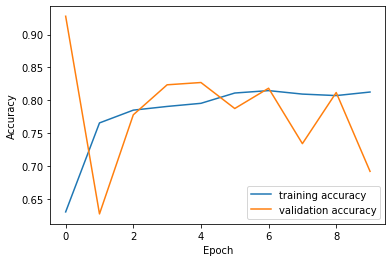

In [7]:
e_arr=list(range(1,51))
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

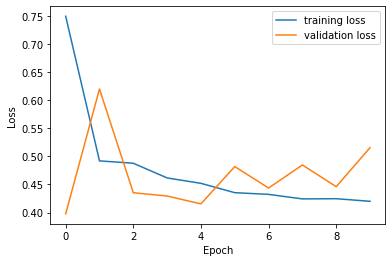

In [8]:
e_arr=list(range(1,51))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

#### Plot Test Results

Found 2898 images belonging to 2 classes.


/scratch/5236879.1.a40/ipykernel_14236/3278958914.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(eval_generator,18,verbose=1)


18/18 [==============================] - 4s 215ms/step
covid/13_Bjorke_1.png


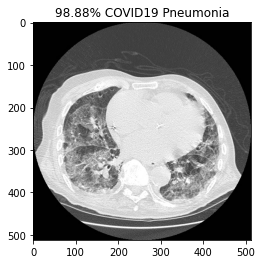

covid/13_Bjorke_10.png


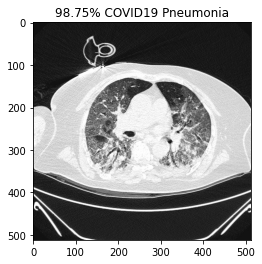

covid/13_Bjorke_2.png


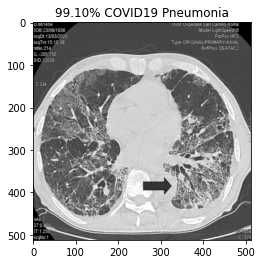

covid/13_Bjorke_20.png


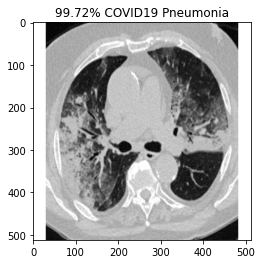

covid/13_Bjorke_24.png


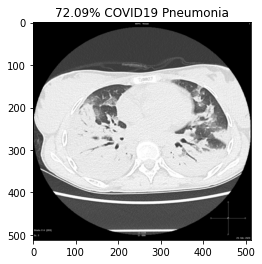

covid/13_Bjorke_25.png


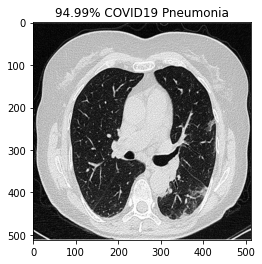

covid/13_Bjorke_3.png


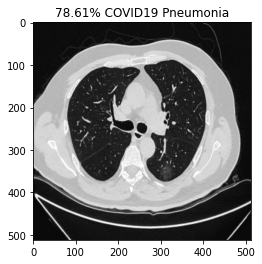

covid/13_Bjorke_40.png


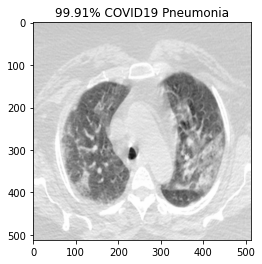

covid/13_Bjorke_47.png


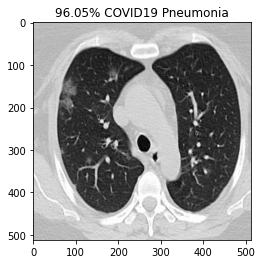

covid/13_Bjorke_60.png


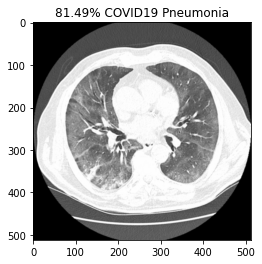

covid/13_Bjorke_79.png


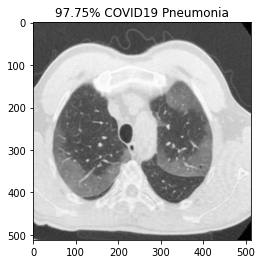

covid/13_Bjorke_90.png


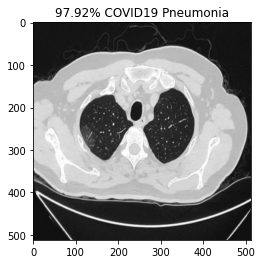

covid/13_Bjorke_98.png


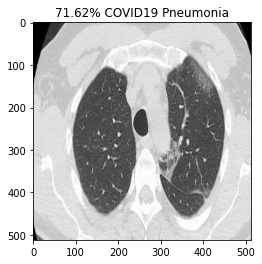

covid/14_Jun_coronacases_case10_102.png


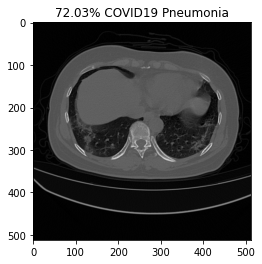

covid/14_Jun_coronacases_case10_105.png


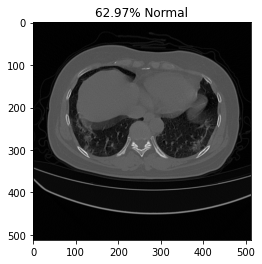

covid/14_Jun_coronacases_case10_106.png


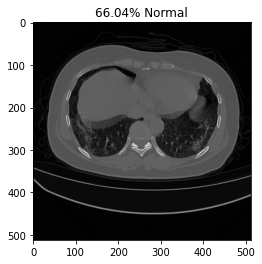

covid/14_Jun_coronacases_case10_109.png


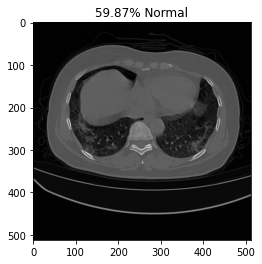

covid/14_Jun_coronacases_case10_123.png


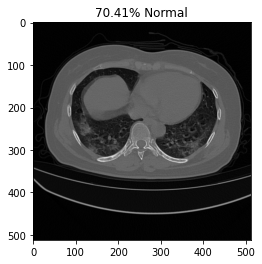

In [9]:
import matplotlib.image as mpimg

test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")
eval_generator.reset()
pred = model.predict_generator(eval_generator,18,verbose=1)
for index, probability in enumerate(pred):
    image_path = TEST_DIR + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    if image.ndim < 3:
        image = np.reshape(image,(image.shape[0],image.shape[1],1))
        image = np.concatenate([image, image, image], 2)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()

## TSNE Plot

In [12]:
from sklearn.manifold import TSNE

intermediate_layer_model = models.Model(inputs=model.input,
                                        outputs=model.get_layer('feature_dense').output)
tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")

Found 11588 images belonging to 2 classes.


In [14]:
X_predicted=intermediate_layer_model.predict(tsne_data_generator)

In [15]:
X_embedded = TSNE(n_components=2).fit_transform(X_predicted)

/share/pkg.7/python3/3.9.9/install/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/share/pkg.7/python3/3.9.9/install/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


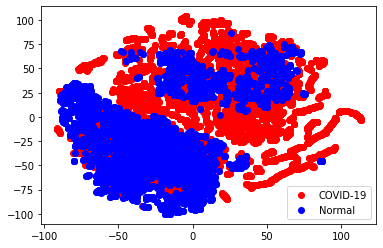

In [16]:
for i in range(len(tsne_data_generator)):
    if tsne_data_generator[i][1]==0.0:
        s1=plt.scatter(X_embedded[i, 0], X_embedded[i, 1],c='r')
    else:
        s2=plt.scatter(X_embedded[i, 0], X_embedded[i, 1],c='b')

plt.legend((s1,s2),('COVID-19','Normal') ,loc = 'best')
plt.show()

In [17]:
test_datagen = ImageDataGenerator(rescale = 1. / 255)
eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")
eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),use_multiprocessing = False,verbose=1,workers=1)

print('test loss:' , x[0])
print('test accuracy:', x[1])

Found 2898 images belonging to 2 classes.
2898


/scratch/5236879.1.a40/ipykernel_14236/4183243266.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),use_multiprocessing = False,verbose=1,workers=1)


2898/2898 [==============================] - 634s 219ms/step - loss: 0.4393 - acc: 0.7816
test loss: 0.4393061101436615
test accuracy: 0.781573474407196
